## ARIMA METHOD

In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

from mpl_finance import candlestick_ohlc
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator


%matplotlib inline

In [56]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [57]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [58]:
df.columns = ['Month', 'Milk in Pounds per cow']

In [59]:
df.tail()

,Month,Milk in Pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [60]:
df.drop(168, axis=0, inplace = True)

In [61]:
df['Month'] = pd.to_datetime(df['Month'])

In [62]:
df.head()

,Month,Milk in Pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [63]:
df.set_index('Month', inplace=True)

In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [65]:
#step 2 visualize data 

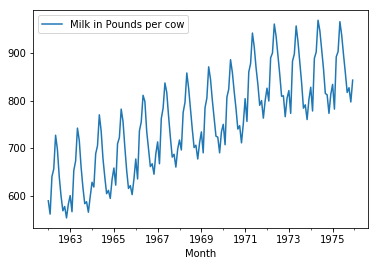

In [66]:
df.plot()

In [67]:
time_series = df['Milk in Pounds per cow']

In [68]:
type(time_series)

pandas.core.series.Series

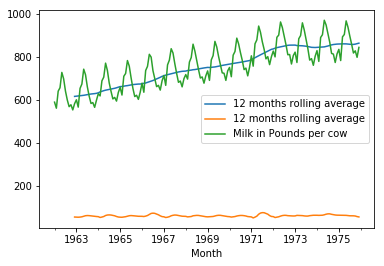

In [69]:
time_series.rolling(12).mean().plot(label = '12 months rolling average')
time_series.rolling(12).std().plot(label = '12 months rolling average')
time_series.plot()
plt.legend()

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
decomp = seasonal_decompose(time_series)

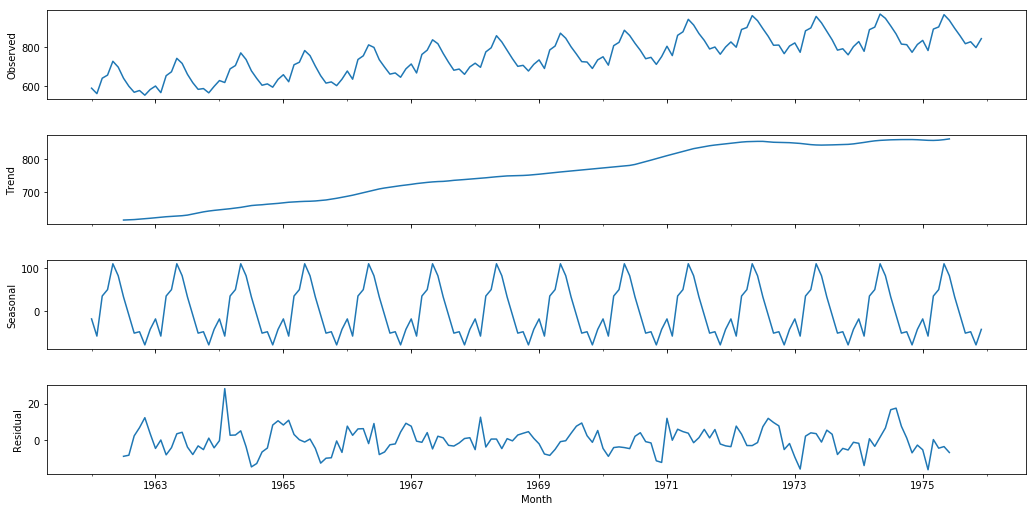

In [74]:
fig =decomp.plot()
fig.set_size_inches(16,8)